<a href="https://colab.research.google.com/github/PatrickRuan/DL-CVMarathon/blob/master/homework/Day015_Cifar_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 『本次練習內容』
#### 運用這幾天所學觀念搭建一個CNN分類器

## 『本次練習目的』
  #### 熟悉CNN分類器搭建步驟與原理
  #### 學員們可以嘗試不同搭法，如使用不同的Maxpooling層，用GlobalAveragePooling取代Flatten等等

In [2]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.datasets import cifar10
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder


In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(x_train.shape) #(50000, 32, 32, 3)

## Normalize Data
def normalize(X_train,X_test):
        mean = np.mean(X_train,axis=(0,1,2,3))
        std = np.std(X_train, axis=(0, 1, 2, 3))
        X_train = (X_train-mean)/(std+1e-7)
        X_test = (X_test-mean)/(std+1e-7) 
        return X_train, X_test,mean,std
    
    
## Normalize Training and Testset    
x_train, x_test,mean_train,std_train = normalize(x_train, x_test) 

170500096/170498071 [==============================] - 6s 0us/step
(50000, 32, 32, 3)


In [4]:
## OneHot Label 由(None, 1)-(None, 10)
## ex. label=2,變成[0,0,1,0,0,0,0,0,0,0]
one_hot=OneHotEncoder()
y_train=one_hot.fit_transform(y_train).toarray()
y_test=one_hot.transform(y_test).toarray()

In [6]:

classifier=Sequential()

#卷積組合
classifier.add(Convolution2D(32,(3,3),input_shape = (32,32,3), activation = 'relu'))#32,3,3,input_shape=(32,32,3),activation='relu''
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size=(2,2)))

#卷積組合
classifier.add(Convolution2D(64,(3,3),activation='relu'))
classifier.add(BatchNormalization())

classifier.add(Flatten())

classifier.add(Dense(128,activation='relu')) #output_dim=100,activation=relu

#輸出
classifier.add(Dense(10,activation='softmax'))

#超過兩個就要選categorical_crossentrophy
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = classifier.fit(x_train,y_train,batch_size=100,epochs=100, validation_split = 0.2, verbose=2)

Epoch 1/100
400/400 - 2s - loss: 1.4924 - accuracy: 0.5330 - val_loss: 1.4102 - val_accuracy: 0.5149
Epoch 2/100
400/400 - 2s - loss: 0.7827 - accuracy: 0.7283 - val_loss: 1.0242 - val_accuracy: 0.6557
Epoch 3/100
400/400 - 2s - loss: 0.4668 - accuracy: 0.8385 - val_loss: 1.1323 - val_accuracy: 0.6530
Epoch 4/100
400/400 - 2s - loss: 0.2568 - accuracy: 0.9121 - val_loss: 1.3674 - val_accuracy: 0.6536
Epoch 5/100
400/400 - 2s - loss: 0.1444 - accuracy: 0.9525 - val_loss: 1.4291 - val_accuracy: 0.6634
Epoch 6/100
400/400 - 2s - loss: 0.1243 - accuracy: 0.9578 - val_loss: 1.6449 - val_accuracy: 0.6634
Epoch 7/100
400/400 - 2s - loss: 0.1140 - accuracy: 0.9618 - val_loss: 1.8878 - val_accuracy: 0.6419
Epoch 8/100
400/400 - 2s - loss: 0.1261 - accuracy: 0.9577 - val_loss: 1.8046 - val_accuracy: 0.6480
Epoch 9/100
400/400 - 2s - loss: 0.1051 - accuracy: 0.9649 - val_loss: 2.0826 - val_accuracy: 0.6573
Epoch 10/100
400/400 - 2s - loss: 0.0762 - accuracy: 0.9741 - val_loss: 2.0379 - val_accura

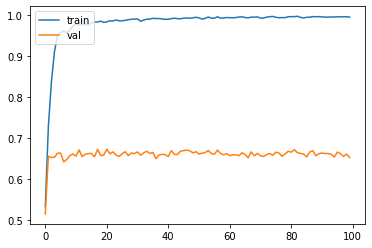

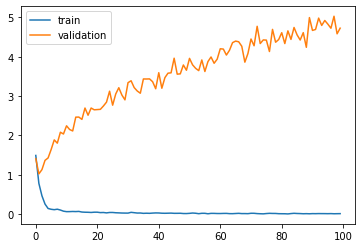

In [18]:
history.history['accuracy']
history.history['loss']
history.history['val_accuracy']
history.history['val_loss']
import matplotlib.pyplot as plt
plt.plot(range(100), history.history['accuracy'], label='train')
plt.plot(range(100), history.history['val_accuracy'], label='val')
plt.legend(loc=2)
plt.show()

plt.plot(range(100), history.history['loss'], label='train')
plt.plot(range(100), history.history['val_loss'],label='validation')
plt.legend(loc=2)
plt.show()



## 預測新圖片，輸入影像前處理要與訓練時相同
#### ((X-mean)/(std+1e-7) ):這裡的mean跟std是訓練集的
## 維度如下方示範

In [19]:
input_example=(np.zeros(shape=(1,32,32,3))-mean_train)/(std_train+1e-7) 
classifier.predict(input_example)

array([[4.9977700e-07, 1.2765700e-17, 9.5997071e-01, 6.1924591e-05,
        3.9965566e-02, 7.0593705e-23, 3.2188241e-09, 1.3263622e-06,
        5.8759095e-09, 9.1964489e-23]], dtype=float32)